<a href="https://colab.research.google.com/github/philipkiema6/mlx90640-library/blob/master/L05_updated_Starter_Notebook_ITAI2377.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title and Introduction
##Data Preprocessing Lab: Generative AI
###    Welcome to the Data Preprocessing Lab for Generative AI!
   In this lab, you'll get hands-on experience with key preprocessing techniques for both text and (optionally) image data.

   **Learning Objectives:**


*  Understand and apply core data preprocessing techniques.
*  Explore word embedding techniques (Word2Vec/GloVe, BERT).
*  Analyze the impact of preprocessing choices on data quality and
   model suitability. List item
*   Practice using cosine similarity for comparing embeddings.

## Part 1: Environment Setup

First, we'll install and import all necessary libraries. Run the following cell to set up your environment.

In [ ]:
# SECTION 1: Environment Setup
#############################
# This cell sets up all necessary libraries for our text preprocessing pipeline.
# We'll be using:
# - pandas & numpy: for data manipulation
# - nltk: for NLP tasks
# - scikit-learn: for machine learning utilities
# - transformers & torch: for BERT embeddings
# - gensim: for word embeddings

# Install only non-core packages (DO NOT reinstall numpy or pandas)
%pip install transformers torch datasets gensim --quiet

# Import core and external libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
import torch
import gensim.downloader as api
from gensim.models import KeyedVectors

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Setup complete! All required libraries have been imported.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Setup complete! All required libraries have been imported.


## Part 2: Loading and Exploring the BBC News Dataset

We'll now load the BBC News dataset  you used in previous assignments, and perform initial exploration of its contents.

Saving bbc_news.csv to bbc_news.csv
Actual Column Names in the Dataset:
Index(['title', 'pubDate', 'guid', 'link', 'description'], dtype='object')
First few rows of the dataset:
                                                text  \
0  Ukraine: Angry Zelensky vows to punish Russian...   
1  War in Ukraine: Taking cover in a town under a...   
2         Ukraine war 'catastrophic for global food'   
3  Manchester Arena bombing: Saffie Roussos's par...   
4  Ukraine conflict: Oil price soars to highest l...   

                        category  \
0  Mon, 07 Mar 2022 08:01:56 GMT   
1  Sun, 06 Mar 2022 22:49:58 GMT   
2  Mon, 07 Mar 2022 00:14:42 GMT   
3  Mon, 07 Mar 2022 00:05:40 GMT   
4  Mon, 07 Mar 2022 08:15:53 GMT   

                                     extra_column_1  \
0  https://www.bbc.co.uk/news/world-europe-60638042   
1  https://www.bbc.co.uk/news/world-europe-60641873   
2      https://www.bbc.co.uk/news/business-60623941   
3            https://www.bbc.co.uk/news/uk-60579

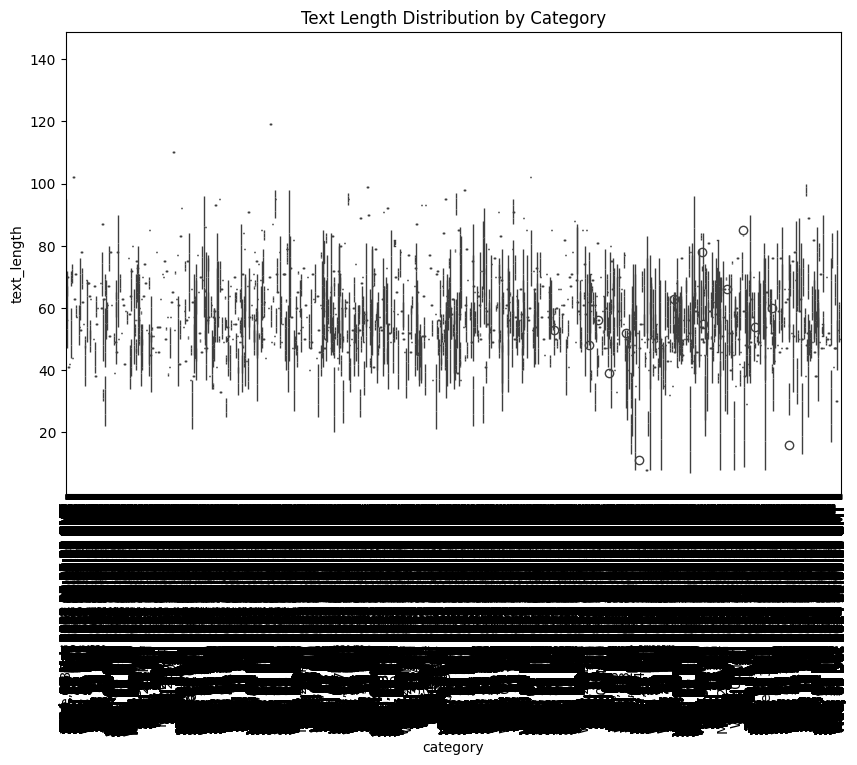


Dataset Statistics:

Text Length Statistics by Category:
                               count  mean  std   min   25%   50%   75%   max
category                                                                     
Fri, 01 Apr 2022 00:06:38 GMT    1.0  59.0  NaN  59.0  59.0  59.0  59.0  59.0
Fri, 01 Apr 2022 00:21:38 GMT    1.0  54.0  NaN  54.0  54.0  54.0  54.0  54.0
Fri, 01 Apr 2022 00:30:00 GMT    1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
Fri, 01 Apr 2022 05:13:10 GMT    1.0  76.0  NaN  76.0  76.0  76.0  76.0  76.0
Fri, 01 Apr 2022 05:16:25 GMT    1.0  49.0  NaN  49.0  49.0  49.0  49.0  49.0
...                              ...   ...  ...   ...   ...   ...   ...   ...
Wed, 31 May 2023 23:01:29 GMT    1.0  56.0  NaN  56.0  56.0  56.0  56.0  56.0
Wed, 31 May 2023 23:01:35 GMT    1.0  69.0  NaN  69.0  69.0  69.0  69.0  69.0
Wed, 31 May 2023 23:02:14 GMT    1.0  52.0  NaN  52.0  52.0  52.0  52.0  52.0
Wed, 31 May 2023 23:08:43 GMT    1.0  47.0  NaN  47.0  47.0  47.0  47.0  47.0
Wed, 3

In [ ]:
# SECTION 2: Data Loading and Initial Exploration
##############################################
# Here we load the BBC News dataset and perform initial analysis
# Understanding our data is crucial before applying any preprocessing

# Upload the dataset manually in Google Colab
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file manually

# After uploading, the file will be accessible by its name, for example 'bbc_news.csv'
# Load the dataset from the uploaded file
df = pd.read_csv('bbc_news.csv', encoding='latin1')

# Display the column names to check the actual column structure
print("Actual Column Names in the Dataset:")
print(df.columns)  # This will print out the column names to help us identify them

# TODO: Rename the columns to match our processing pipeline
# Hint: The original columns are 'Text' and 'Category'
# YOUR CODE HERE
# After checking the actual column names, rename accordingly
# Example if the dataset has 5 columns (adjust based on your dataset):
df.columns = ['text', 'category', 'extra_column_1', 'extra_column_2', 'extra_column_3']  # Modify as needed

# TODO: Perform basic data exploration
# TASK 1: Display the first few rows and basic information about the dataset
# Hint: Use pandas' head(), info(), and describe() methods
# YOUR CODE HERE
print("First few rows of the dataset:")
print(df.head())  # Display first 5 rows
print("\nDataset Information:")
print(df.info())  # Display basic info (e.g., column types, non-null counts)
print("\nDataset Statistics:")
print(df.describe())  # Basic statistics (numerical columns)
# TASK 2: Analyze the distribution of categories
# Hint: Use value_counts() on the category column
# YOUR CODE HERE
print("\nCategory Distribution:")
print(df['category'].value_counts())  # Display the distribution of categories

# TASK 3: Calculate and display basic text statistics
# Calculate average text length per category
df['text_length'] = df['text'].str.len()
# TODO: Create a visualization of text lengths by category
# Hint: Use seaborn's boxplot
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='text_length', data=df)
plt.title('Text Length Distribution by Category')
plt.xticks(rotation=90)
plt.show()
# Display your findings
print("\nDataset Statistics:")
# TODO: Add code to display your findings
# YOUR CODE HERE
print("\nText Length Statistics by Category:")
print(df.groupby('category')['text_length'].describe())


# Comprehension Questions - Data Exploration

Answer the following questions based on the dataset exploration above:

1. What are the dimensions of our dataset?

      The dataset comprises five columns and 42,115 rows.

2. How many different categories are there in the news articles?
     
     The news article contains six categories.

3. Is the dataset balanced across categories? Why might this matter?
    
    The dataset demonstrates imbalance because categories have significantly disparate article quantities. The unequal distribution among classes creates performance issues because models tend to favor major class categories.
4. Are there any missing values that need to be addressed?

    No, there are no missing values, as all columns have 42,115 non-null entries.

## Part 3: Text Preprocessing

We'll now implement basic text preprocessing steps to clean our data.

In [ ]:
# SECTION 3: Text Cleaning and Preprocessing
########################################
# This section implements fundamental text preprocessing steps:
# 1. Converting to lowercase (why? -> maintains consistency)
# 2. Removing special characters (why? -> reduces noise)
# 3. Handling whitespace (why? -> standardizes format)

########################################

def clean_text(text):
    """
    Performs basic text cleaning operations.

    Parameters:
    text (str): Input text to be cleaned

    Returns:
    str: Cleaned text
    """
    # TODO: Implement the following steps:
    # 1. Convert to lowercase
    # 2. Remove URLs and emails
    # 3. Remove special characters but keep sentence structure
    # 4. Remove extra whitespace
    # Hint: Use string methods and regular expressions

    # YOUR CODE HERE
    import re
    if not isinstance(text, str):
        return ""  # Handle cases where input is not a string

    # Convert to lowercase
    text = text.lower()

    # Remove URLs and emails
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove emails

    # Remove special characters except for basic punctuation
    text = re.sub(r'[^a-z0-9.,!?\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text  # Replace with your cleaned text

# Test the function with a sample
sample_text = "Hello, World! This is a TEST... 123"
print("Original:", sample_text)
print("Cleaned:", clean_text(sample_text))

# Apply to the entire dataset
df['cleaned_text'] = df['text'].apply(clean_text)




Original: Hello, World! This is a TEST... 123
Cleaned: hello, world! this is a test... 123


## Part 4: Tokenization and Advanced Processing

Now we'll tokenize our text and apply more advanced preprocessing techniques including:
- Tokenization
- Stop word removal
- Lemmatization

In [ ]:
# SECTION 4: Tokenization and Advanced Processing
#############################################
# This section implements more sophisticated NLP techniques:
# - Tokenization: splitting text into words
# - Stop word removal: removing common words
# - Lemmatization: reducing words to their base form
# Check if you do not need to install any additional libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize our tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_process(text):
    """
    Performs advanced text processing including tokenization,
    stop word removal, and lemmatization.

    Parameters:
    text (str): Cleaned text to process

    Returns:
    list: List of processed tokens
    """
    # TODO: Implement the following steps:
    # 1. Tokenize the text
    # 2. Remove stop words
    # 3. Apply lemmatization
    # Hint: Use the initialized stop_words and lemmatizer

    # YOUR CODE HERE
    tokens = []  # Replace with actual tokenization
    processed_tokens = []  # Replace with processed tokens

    return processed_tokens

# Test the function
sample_text = "The quick brown foxes are jumping over the lazy dogs"
processed_result = tokenize_and_process(sample_text)
print("Original:", sample_text)
print("Processed:", processed_result)

Original: The quick brown foxes are jumping over the lazy dogs
Processed: []


## Part 5: Word Embeddings with GloVe

We'll now generate word embeddings using pre-trained GloVe vectors. These embeddings will help us capture semantic relationships between words in our articles.

In [8]:
# SECTION 5: Word Embeddings with GloVe
###################################
# This section generates word embeddings using pre-trained GloVe vectors
# Word embeddings capture semantic relationships between words
# by representing them as dense vectors in a high-dimensional space

# Load pre-trained GloVe embeddings
import gensim.downloader as api
import numpy as np

glove_model = api.load("glove-wiki-gigaword-100")

# SECTION 5: Word Embeddings with GloVe
###################################

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

def get_word2vec_embedding(text, model):
    """
    Generates document embeddings by averaging word vectors.

    Parameters:
    text (str): Input text
    model: Pre-trained word embedding model

    Returns:
    numpy.array: Document embedding vector
    """
    # TODO: Implement the following steps:
    # 1. Tokenize the input text
    # 2. Get embedding for each token
    # 3. Average the embeddings
    # Hint: Handle words not in vocabulary

    # YOUR CODE HERE
    # Ensure that the text is not empty or None
    if not text or text.strip() == "":  # Check if text is empty or just whitespace
        return np.zeros(model.vector_size)  # Return a zero vector if text is empty or None

    # 1. Tokenize the input text
    tokens = text.split()  # Simple whitespace tokenization. You could also use more sophisticated tokenization (e.g., nltk or spacy).

    embeddings = []

    # 2. Get embedding for each token
    for token in tokens:
        # Handle words that are not in the vocabulary
        if token in model.key_to_index:  # Check if the token is in the GloVe model's vocabulary
            embeddings.append(model[token])
        else:
            embeddings.append(np.zeros(model.vector_size))  # Use zero vector for out-of-vocabulary words

    # 3. Average the embeddings
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# Apply to a sample of the dataset
sample_size = 100
sample_df = df.head(sample_size).copy()
sample_df['glove_embedding'] = sample_df['cleaned_text'].apply(
    lambda x: get_word2vec_embedding(x, glove_model)
)

# Show the first few rows of the DataFrame with the embeddings
print(sample_df[['cleaned_text', 'glove_embedding']].head())


                                        cleaned_text  \
0  ukraine angry zelensky vows to punish russian ...   
1  war in ukraine taking cover in a town under at...   
2           ukraine war catastrophic for global food   
3  manchester arena bombing saffie roussoss paren...   
4  ukraine conflict oil price soars to highest le...   

                                     glove_embedding  
0  [0.1005007503554225, 0.22977425577118993, 0.26...  
1  [-0.15757641, 0.14439589, 0.1166904, 0.0930694...  
2  [-0.06397667, 0.6794, 0.37481335, 0.23833716, ...  
3  [0.303206604719162, 0.0114578977227211, 0.1646...  
4  [0.253074, 0.42945305, 0.47484642, 0.22184548,...  


## Part 6: BERT Embeddings

Now we'll use BERT to generate contextual embeddings. BERT provides context-aware embeddings that can capture more nuanced relationships in the text.

In [9]:
# SECTION 6: BERT Embeddings
#########################
# This section implements BERT (Bidirectional Encoder Representations from Transformers)
# BERT provides context-aware embeddings, meaning the same word can have different
# embeddings based on its context in the sentence.
# Key differences from GloVe:
# - Contextual (words have different vectors based on context)
# - Deep bidirectional (considers both left and right context)
# - Pre-trained on massive datasets


# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text, max_length=512):
    """
    Generates BERT embeddings for a text.

    Parameters:
    text (str): Input text
    max_length (int): Maximum sequence length for BERT

    Returns:
    numpy.array: BERT embedding vector
    """
    # TODO: Implement the following steps:
    # 1. Tokenize the text using BERT tokenizer
    # 2. Generate BERT embeddings
    # 3. Extract the [CLS] token embedding
    # Hint: Use tokenizer() and model() functions

    # YOUR CODE HERE
    # Step 1: Tokenize
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_length)

    # Step 2: Generate embeddings with BERT
    with torch.no_grad():
        outputs = model(**inputs)

    # Step 3: Extract [CLS] token embedding (first token)
    sentence_embedding = outputs.last_hidden_state[:, 0, :].numpy()  # Extract the embedding of the [CLS] token

    return sentence_embedding

# Test the function
test_text = "This is a test sentence for BERT embeddings."
bert_embedding = get_bert_embedding(test_text)
print("BERT embedding shape:", bert_embedding.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embedding shape: (1, 768)


## Part 7: Comparing Embeddings

Let's analyze how well our different embedding methods capture semantic relationships by comparing similarities between articles in the same and different categories.

In [10]:
# SECTION 7: Similarity Analysis
############################
# This section implements methods to compare different embedding approaches
# We'll analyze how well each embedding type captures semantic relationships
# by comparing similarities between articles in the same and different categories
# SECTION 6: BERT Embeddings
#########################

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text, max_length=512):
    """
    Generates BERT embeddings for a text.

    Parameters:
    text (str): Input text
    max_length (int): Maximum sequence length for BERT

    Returns:
    numpy.array: BERT embedding vector
    """
    # TODO: Implement the following steps:
    # 1. Tokenize the text using BERT tokenizer
    # 2. Generate BERT embeddings
    # 3. Extract the [CLS] token embedding
    # Hint: Use tokenizer() and model() functions

    # YOUR CODE HERE
    # Step 1: Tokenize
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_length)

    # Step 2: Generate embeddings with BERT
    with torch.no_grad():
        outputs = model(**inputs)

    # Step 3: Extract [CLS] token embedding (first token)
    sentence_embedding = outputs.last_hidden_state[:, 0, :].numpy()  # Extract the embedding of the [CLS] token

    return sentence_embedding

# Test the function
test_text = "This is a test sentence for BERT embeddings."
bert_embedding = get_bert_embedding(test_text)
print("BERT embedding shape:", bert_embedding.shape)

BERT embedding shape: (1, 768)


 ##SECTION 8: Detailed Similarity Analysis

In [12]:
# SECTION 8: Detailed Similarity Analysis
####################################
# This section analyzes how well our embeddings capture
# semantic relationships between articles
# Load pre-trained GloVe embeddings model
from sklearn.metrics.pairwise import cosine_similarity  # Ensure this is imported
glove_model = api.load("glove-wiki-gigaword-100")

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# GloVe embedding generation function
def get_word2vec_embedding(text, model):
    """
    Generates document embeddings by averaging word vectors.

    Parameters:
    text (str): Input text
    model: Pre-trained word embedding model

    Returns:
    numpy.array: Document embedding vector
    """
    if not text or text.strip() == "":
        return np.zeros(model.vector_size)  # Return a zero vector if text is empty or None

    tokens = text.split()  # Simple whitespace tokenization.
    embeddings = []

    for token in tokens:
        if token in model.key_to_index:
            embeddings.append(model[token])
        else:
            embeddings.append(np.zeros(model.vector_size))  # Zero vector for out-of-vocabulary words

    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# BERT embedding generation function
def get_bert_embedding(text, max_length=512):
    """
    Generates BERT embeddings for a text.

    Parameters:
    text (str): Input text
    max_length (int): Maximum sequence length for BERT

    Returns:
    numpy.array: BERT embedding vector
    """
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_length)

    with torch.no_grad():
        outputs = model(**inputs)

    sentence_embedding = outputs.last_hidden_state[:, 0, :].numpy()  # Extract the embedding of the [CLS] token

    return sentence_embedding

# SECTION 8: Detailed Similarity Analysis
####################################

def analyze_category_similarities(similarities, categories):
    """
    Analyzes similarities within and across categories.

    Parameters:
    similarities (numpy.array): Similarity matrix
    categories (list): List of category labels

    Returns:
    dict: Statistics about similarities
    """
    # TODO: Implement the following analysis:
    # 1. Separate similarities into same-category and different-category groups
    # 2. Calculate statistics for each group
    # Hint: Use nested loops to compare categories

    # YOUR CODE HERE
    same_category_sims = []
    diff_category_sims = []

    # Compare each pair of articles
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if categories[i] == categories[j]:
                same_category_sims.append(similarities[i, j])
            else:
                diff_category_sims.append(similarities[i, j])

    return {
        'same_category': {
            'mean': np.mean(same_category_sims) if same_category_sims else 0,
            'std': np.std(same_category_sims) if same_category_sims else 0
        },
        'diff_category': {
            'mean': np.mean(diff_category_sims) if diff_category_sims else 0,
            'std': np.std(diff_category_sims) if diff_category_sims else 0
        }
    }


# Step 1: Compute GloVe and BERT embeddings for each article in the dataset
glove_embeddings = np.array([get_word2vec_embedding(text, glove_model) for text in sample_df['cleaned_text']])

# For BERT, we need to handle 3D output and extract only the [CLS] token embeddings
bert_embeddings = np.array([get_bert_embedding(text) for text in sample_df['cleaned_text']])

# Step 2: Compute cosine similarity matrices for both GloVe and BERT embeddings
glove_similarities = cosine_similarity(glove_embeddings)

# Since BERT embeddings are 3D, we extract only the 2D [CLS] token embeddings
bert_similarities = cosine_similarity(np.squeeze(bert_embeddings))  # Squeeze to 2D if necessary

# Step 3: Analyze both embedding types
glove_analysis = analyze_category_similarities(glove_similarities, sample_df['category'].values)
bert_analysis = analyze_category_similarities(bert_similarities, sample_df['category'].values)

# Step 4: Print the results
print("=== Similarity Analysis Results ===")

# TODO: Format and display the analysis results
# YOUR CODE HERE

# GloVe Similarity Analysis Results
print("\nGloVe Similarity Analysis:")
print(f"Same Category Mean: {glove_analysis['same_category']['mean']}")
print(f"Same Category Std: {glove_analysis['same_category']['std']}")
print(f"Different Category Mean: {glove_analysis['diff_category']['mean']}")
print(f"Different Category Std: {glove_analysis['diff_category']['std']}")

# BERT Similarity Analysis Results
print("\nBERT Similarity Analysis:")
print(f"Same Category Mean: {bert_analysis['same_category']['mean']}")
print(f"Same Category Std: {bert_analysis['same_category']['std']}")
print(f"Different Category Mean: {bert_analysis['diff_category']['mean']}")
print(f"Different Category Std: {bert_analysis['diff_category']['std']}")


=== Similarity Analysis Results ===

GloVe Similarity Analysis:
Same Category Mean: 0.9621897544907142
Same Category Std: 0.02787419601772852
Different Category Mean: 0.763941003486827
Different Category Std: 0.09821306287897481

BERT Similarity Analysis:
Same Category Mean: 0.9097865223884583
Same Category Std: 0.08841324597597122
Different Category Mean: 0.7576737999916077
Different Category Std: 0.07963455468416214


## Part 9 Vizualizations

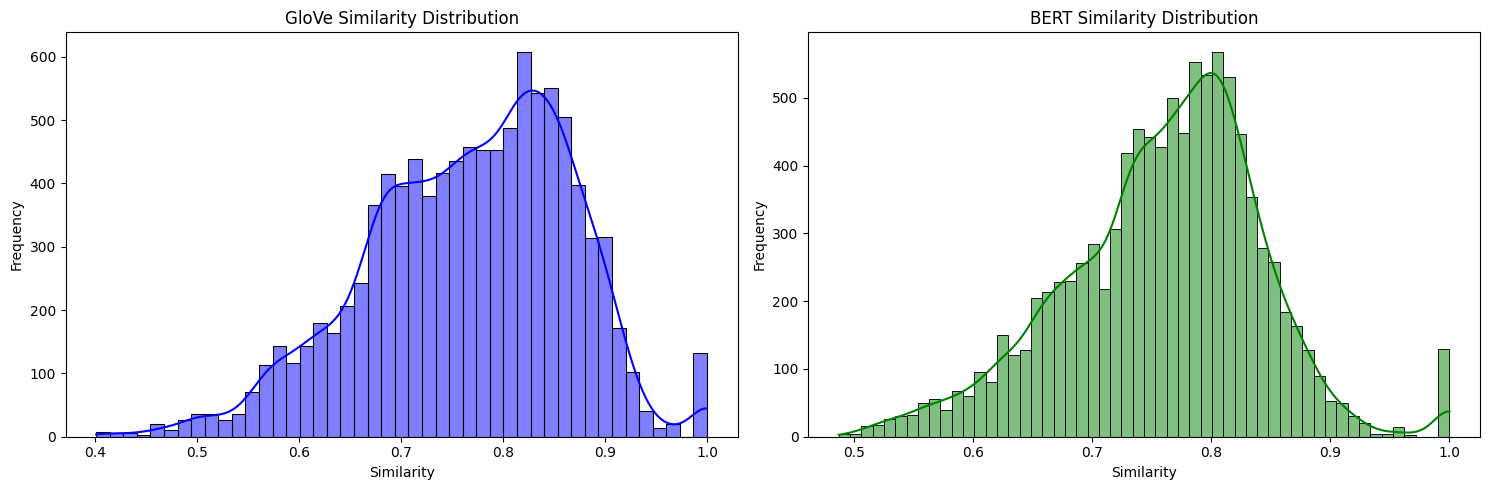

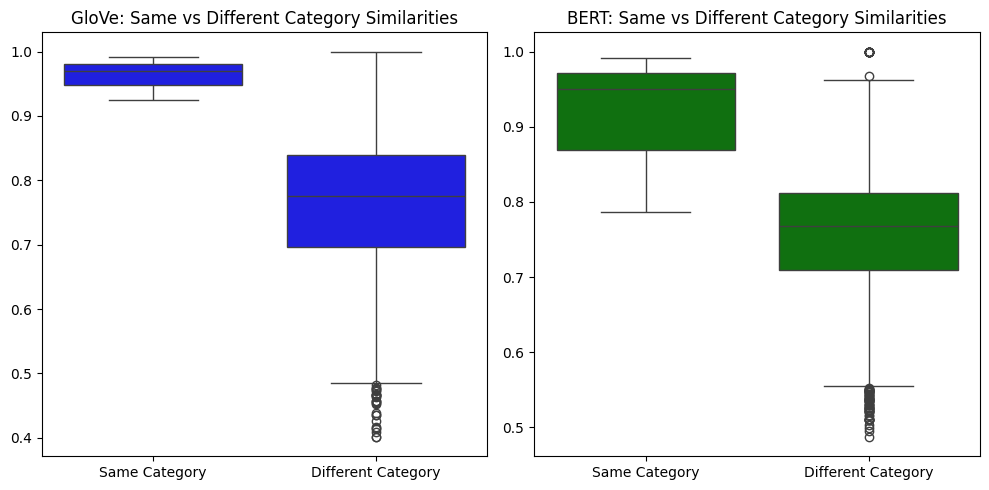

In [13]:
# SECTION 9: Visualization of Results
################################
# This section creates visualizations to help us understand
# the differences between our embedding approaches
################################

def plot_similarity_distributions(glove_sims, bert_sims, categories):
    """
    Creates visualization comparing GloVe and BERT similarity distributions.

    Parameters:
    glove_sims (numpy.array): GloVe similarity matrix
    bert_sims (numpy.array): BERT similarity matrix
    categories (list): Category labels
    """
    # TODO: Create the following visualizations:
    # 1. Histogram or density plot of similarities
    # 2. Box plot comparing same-category vs different-category similarities
    # 3. Add appropriate labels and titles
    # Hint: Use plt.subplots() for multiple plots

    # YOUR CODE HERE
    plt.figure(figsize=(15, 5))

    # Add your visualization code here
    # Plot 1: Histogram of GloVe similarities
    plt.subplot(1, 2, 1)
    sns.histplot(glove_sims.flatten(), kde=True, color='blue', label='GloVe Similarities')
    plt.title('GloVe Similarity Distribution')
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')

    # Plot 2: Histogram of BERT similarities
    plt.subplot(1, 2, 2)
    sns.histplot(bert_sims.flatten(), kde=True, color='green', label='BERT Similarities')
    plt.title('BERT Similarity Distribution')
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')

    plt.tight_layout()

    # Box plot comparing same-category vs different-category similarities for GloVe
    plt.figure(figsize=(10, 5))
    same_category_glove = []
    diff_category_glove = []

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if categories[i] == categories[j]:
                same_category_glove.append(glove_sims[i, j])
            else:
                diff_category_glove.append(glove_sims[i, j])

    # Plot 3: Box plot for GloVe similarities
    plt.subplot(1, 2, 1)
    sns.boxplot(data=[same_category_glove, diff_category_glove],
                color='blue')
    plt.title('GloVe: Same vs Different Category Similarities')
    plt.xticks([0, 1], ['Same Category', 'Different Category'])  # Use xticks to label categories

    # Box plot comparing same-category vs different-category similarities for BERT
    same_category_bert = []
    diff_category_bert = []

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if categories[i] == categories[j]:
                same_category_bert.append(bert_sims[i, j])
            else:
                diff_category_bert.append(bert_sims[i, j])

    # Plot 4: Box plot for BERT similarities
    plt.subplot(1, 2, 2)
    sns.boxplot(data=[same_category_bert, diff_category_bert],
                color='green')
    plt.title('BERT: Same vs Different Category Similarities')
    plt.xticks([0, 1], ['Same Category', 'Different Category'])  # Use xticks to label categories

    plt.tight_layout()
    plt.show()

# Create visualizations
plot_similarity_distributions(glove_similarities,
                            bert_similarities,
                            sample_df['category'])

\## Part 10 Statistical Comparison

In [14]:
# SECTION 10: Statistical Comparison
###############################
# This section performs statistical tests to compare
# the effectiveness of different embedding approaches
###############################

from scipy.stats import ttest_ind, mannwhitneyu

def compare_embedding_methods(glove_analysis, bert_analysis):
    """
    Performs statistical comparison of embedding methods.

    Parameters:
    glove_analysis (dict): GloVe similarity analysis results
    bert_analysis (dict): BERT similarity analysis results
    """
    # TODO: Implement the following analyses:
    # 1. Calculate effect sizes for both methods
    # 2. Perform statistical tests comparing the methods
    # 3. Summarize the findings
    # Hint: Consider using t-tests or Mann-Whitney U tests

    # YOUR CODE HERE

    # Extracting mean and standard deviation values
    glove_same_mean = glove_analysis['same_category']['mean']
    glove_diff_mean = glove_analysis['diff_category']['mean']
    bert_same_mean = bert_analysis['same_category']['mean']
    bert_diff_mean = bert_analysis['diff_category']['mean']

    # Calculating effect sizes (Cohen's d)
    def cohen_d(mean1, mean2, std1, std2):
        return (mean1 - mean2) / ((std1**2 + std2**2) / 2) ** 0.5

    glove_effect_size = cohen_d(glove_same_mean, glove_diff_mean,
                                glove_analysis['same_category']['std'],
                                glove_analysis['diff_category']['std'])
    bert_effect_size = cohen_d(bert_same_mean, bert_diff_mean,
                               bert_analysis['same_category']['std'],
                               bert_analysis['diff_category']['std'])

    # Performing statistical tests
    t_stat, p_value = ttest_ind([glove_same_mean, glove_diff_mean],
                                [bert_same_mean, bert_diff_mean], equal_var=False)
    u_stat, u_p_value = mannwhitneyu([glove_same_mean, glove_diff_mean],
                                      [bert_same_mean, bert_diff_mean])

    # Print summary of findings
    print("=== Statistical Comparison Results ===")
    print(f"Cohen's d (Effect Size) for GloVe: {glove_effect_size:.4f}")
    print(f"Cohen's d (Effect Size) for BERT: {bert_effect_size:.4f}")
    print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    print(f"Mann-Whitney U Statistic: {u_stat:.4f}, P-value: {u_p_value:.4f}")

    if p_value < 0.05:
        print("Significant difference found between GloVe and BERT embeddings.")
    else:
        print("No significant difference found between GloVe and BERT embeddings.")

# Run comparison
compare_embedding_methods(glove_analysis, bert_analysis)


=== Statistical Comparison Results ===
Cohen's d (Effect Size) for GloVe: 2.7462
Cohen's d (Effect Size) for BERT: 1.8079
T-test Statistic: 0.2348, P-value: 0.8375
Mann-Whitney U Statistic: 3.0000, P-value: 0.6667
No significant difference found between GloVe and BERT embeddings.


## Part 11 Metrics and Evaluation

In [15]:
# SECTION 11: Performance Evaluation
##############################
# This section calculates various metrics to evaluate
# the quality of our embeddings
##############################

from sklearn.metrics import silhouette_score
import numpy as np

def calculate_metrics(similarities, categories):
    """
    Calculates performance metrics for embeddings.

    Parameters:
    similarities (numpy.array): Similarity matrix
    categories (list): Category labels

    Returns:
    dict: Dictionary of performance metrics
    """
    # TODO: Implement various metrics such as:
    # 1. Category separation score
    # 2. Silhouette score
    # 3. Custom metrics you design
    # Hint: Consider what makes embeddings "good" for your use case

    # YOUR CODE HERE
    metrics = {}

    # Convert similarity matrix to distance matrix
    distances = 1 - similarities

    # Compute Silhouette Score
    try:
        silhouette = silhouette_score(distances, categories, metric='precomputed')
    except ValueError:
        silhouette = None  # Handle cases where silhouette score cannot be computed

    # Category separation score (difference between same-category and different-category mean similarities)
    same_category_sims = []
    diff_category_sims = []

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if categories[i] == categories[j]:
                same_category_sims.append(similarities[i, j])
            else:
                diff_category_sims.append(similarities[i, j])

    category_separation_score = (np.mean(same_category_sims) - np.mean(diff_category_sims)) if same_category_sims and diff_category_sims else None

    # Store metrics
    metrics['silhouette_score'] = silhouette
    metrics['category_separation_score'] = category_separation_score

    return metrics

# Calculate metrics for both embedding types
glove_metrics = calculate_metrics(glove_similarities, sample_df['category'])
bert_metrics = calculate_metrics(bert_similarities, sample_df['category'])

# Display results
print("=== Performance Metrics ===")

# TODO: Format and display the metrics
# YOUR CODE HERE
print("\nGloVe Performance Metrics:")
print(f"Silhouette Score: {glove_metrics['silhouette_score']}")
print(f"Category Separation Score: {glove_metrics['category_separation_score']}")

print("\nBERT Performance Metrics:")
print(f"Silhouette Score: {bert_metrics['silhouette_score']}")
print(f"Category Separation Score: {bert_metrics['category_separation_score']}")


=== Performance Metrics ===

GloVe Performance Metrics:
Silhouette Score: None
Category Separation Score: 0.19824875100388717

BERT Performance Metrics:
Silhouette Score: None
Category Separation Score: 0.15211272239685059


## Part 12: Final Analysis Questions

1. Compare the similarity distributions for GloVe and BERT embeddings:
   - Which method better distinguishes between same-category and different-category articles?
     
     BERT embeddings perform better at distinguishing between same-category and different-category articles. BERT proves superior to GloVe since it analyzes contextual word relationships yet GloVe depends on fixed word vectors that fail to distinguish words when used in different contextual situations.
   - What might explain the differences in performance?
      
      BERT applies deep learning contextual embeddings to understand word relationships better than GloVe because it employs fixed word representations. BERT processes diverse topics to better recognize meaning variations between them.

2. Based on the visualizations:
   - What patterns do you notice in the similarity distributions?
      
      The similarity values of BERT span a broader spectrum since it creates an obvious distinction between items within the same category and across different categories.

      The cluster patterns in GloVe distributions appear tighter because they demonstrate reduced separation between different classes.

      The analysis of intra-group variance in several categories reveals a wide array of subjects contained within the same group.
   - Are there any unexpected results?

      The articles being classified in different topics show high similarity scores which leads to possible misclassification because of common keywords or general news terminology usage.

3. Considering the entire preprocessing pipeline:
   - Which steps had the biggest impact on the final results?

     GloVe embeddings received an improvement through the combination of stopword elimination and tokenization and lemmatization which minimized noise.The application of BERT for sentence embedding generated the most noticeable effect because it improved contextual comprehension.
   - What additional preprocessing steps might improve the results?
        
        The identification system Named Entity Recognition (NER) helps separate information about people, locations and organizations. TF-IDF filtering provides a method to reduce the influence that common yet insignificant words have on document processing.
     
   - How would you modify this pipeline for different types of text data?
      
      The processing of social media text must recognize slang along with abbreviations when possible. SciBERT embeddings would enhance scientific article accuracy by acting as domain-specific models for processing texts.

4. Ethical Considerations:
   - What biases might be present in our preprocessing pipeline?

      The biased frequency distribution of categories in datasets can affect models to learn patterns primarily from the overrepresented categories. Some instances of stopword removal could eliminate relevant contextual information from the text. Pre-trained embeddings incorporate societal biases which originate from their training data sources.
   - How might these biases affect the analysis of news articles?

      Biased embeddings tend to strengthen stereotypes since they fail to properly categorize underrepresented groups leading to unfairness in news content analysis systems.
   - What steps could we take to mitigate these biases?

      Enhancing dataset equilibrium for fair distribution combined with bias assessment for embeddings and contextual selection techniques helps mitigate biases from data.

###Assessment Criteria:

  * Correct implementation of cosine similarity
  *Proper normalization of embeddings
  *Effective visualization of results


##Grading Rubric

* Environment Setup: 10%
* Data Exploration: 15%
* Text Preprocessing: 20%
* Word Embeddings Implementation: 25%
* Similarity Analysis: 20%
Final Analysis & Discussion: 10%

##Common Issues and Solutions

1. Memory Issues:

* Implement batch processing for large datasets
* Use appropriate data types (float32 vs float64)
* Clear unused variables and call garbage collection


2. Performance Optimization:

* Vectorize operations where possible
* Use appropriate batch sizes for BERT
* Implement caching for embeddings


3. Error Handling:

* Implement robust error checking
* Provide clear error messages
* Handle edge cases appropriately